<a href="https://colab.research.google.com/github/kkmcgg/tide/blob/main/kkmc_baby_tide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

see

[1]https://pytmd.readthedocs.io/en/latest/_modules/pyTMD/compute_tide_corrections.html#compute_corrections

and

[2]https://github.com/digitalearthafrica/deafrica-coastlines/blob/main/coastlines/raster.py#L149

note that [2] is based on [1]. both require tide consituient files which can be aquired from

[3]https://www.tpxo.net/global/tpxo8-atlas

In [1]:
import numpy as np
import pandas as pd

# Simulating a dummy tide model
# Assuming a few major tidal constituents (M2, S2, K1, O1)
# These are just illustrative amplitudes and phases

constituents = ['M2', 'S2', 'K1', 'O1']
amplitudes = np.array([1.0, 0.5, 0.3, 0.2])  # in meters
phases = np.array([0, 90, 180, 270])  # in degrees

# Simulate tide grid data (normally this would be a complex spatial dataset)
grid_lat = np.linspace(44.5, 44.7, 5)  # dummy lat grid points
grid_lon = np.linspace(-63.6, -63.4, 5)  # dummy lon grid points
grid_data = np.array(np.meshgrid(grid_lat, grid_lon)).T.reshape(-1, 2)

# Creating a DataFrame for visualization
tide_model_df = pd.DataFrame({
    'Latitude': grid_data[:, 0],
    'Longitude': grid_data[:, 1],
    'M2 Amplitude': amplitudes[0],
    'S2 Amplitude': amplitudes[1],
    'K1 Amplitude': amplitudes[2],
    'O1 Amplitude': amplitudes[3],
    'M2 Phase': phases[0],
    'S2 Phase': phases[1],
    'K1 Phase': phases[2],
    'O1 Phase': phases[3]
})

print(tide_model_df)


    Latitude  Longitude  M2 Amplitude  S2 Amplitude  K1 Amplitude  \
0      44.50     -63.60           1.0           0.5           0.3   
1      44.50     -63.55           1.0           0.5           0.3   
2      44.50     -63.50           1.0           0.5           0.3   
3      44.50     -63.45           1.0           0.5           0.3   
4      44.50     -63.40           1.0           0.5           0.3   
5      44.55     -63.60           1.0           0.5           0.3   
6      44.55     -63.55           1.0           0.5           0.3   
7      44.55     -63.50           1.0           0.5           0.3   
8      44.55     -63.45           1.0           0.5           0.3   
9      44.55     -63.40           1.0           0.5           0.3   
10     44.60     -63.60           1.0           0.5           0.3   
11     44.60     -63.55           1.0           0.5           0.3   
12     44.60     -63.50           1.0           0.5           0.3   
13     44.60     -63.45           

In [24]:
import numpy as np
import datetime

def time_series_almost(t, hc, constituents, deltat=0.0, corrections='OTIS'):
    nt = len(t)
    # Assuming placeholders for nodal corrections (pu, pf)
    pu = np.random.rand(len(t), len(constituents))
    pf = np.random.rand(len(t), len(constituents))

    ht = np.zeros(nt)

    for k, c in enumerate(constituents):
        # Assuming placeholder frequency and phase for illustration
        frequency = np.random.rand()
        phase = np.random.rand() * 2 * np.pi

        # Decompose the harmonic constant into amplitude and phase
        amplitude = np.abs(hc[k])
        constituent_phase = np.angle(hc[k])

        # Compute the tidal component for this constituent
        tidal_component = amplitude * np.cos(frequency * t * 86400.0 + constituent_phase + phase + pu[:, k])

        # Add the tidal component to the total tide height
        ht += pf[:, k] * tidal_component

    return ht

def time_series(t, hc, constituents, deltat=0.0, corrections='OTIS'):
    nt = len(t)
    # Placeholder nodal corrections (not randomized)
    pu = np.ones((len(t), len(constituents))) ### NEEDS REAL WORLD VALUE
    pf = np.ones((len(t), len(constituents))) ### NEEDS REAL WORLD VALUE

    ht = np.zeros(nt)

    # Placeholder frequencies and phases for each constituent
    # These are typical values but should be replaced with accurate data
    frequencies = {'M2': 1.405189e-4, 'S2': 1.454441e-4, 'K1': 7.292116e-5, 'O1': 6.759774e-5} ### NEEDS REAL WORLD VALUE
    phases = {'M2': 0, 'S2': 0, 'K1': 0, 'O1': 0}  # Placeholder phases ### NEEDS REAL WORLD VALUE

    for k, c in enumerate(constituents):
        frequency = frequencies[c]
        phase = phases[c]

        amplitude = np.abs(hc[k])
        constituent_phase = np.angle(hc[k])

        tidal_component = amplitude * np.cos(frequency * t * 86400.0 + constituent_phase + phase + pu[:, k])

        ht += pf[:, k] * tidal_component

    return ht


# Example usage
constituents = ['M2', 'S2', 'K1', 'O1']
amplitudes = np.array([1.0, 0.5, 0.3, 0.2])  # Amplitudes for constituents
phases = np.array([0, 90, 180, 270])  # Phases for constituents (in degrees)

# Combine amplitudes and phases into a complex number representing harmonic constants
hc = amplitudes * np.exp(1j * np.radians(phases))

if 0: # hard coded number of steps for testing
  # Define a time range (days since 1992-01-01), including fractional days
  start_date = datetime.datetime(1992, 1, 1)
  time_range = [datetime.datetime(2023, 11, 25, hour, 0) for hour in range(0, 24)]

for_x_days = 30
every_x_mins = 60

time_range = [datetime.datetime(2023, 11, 25) + datetime.timedelta(minutes=15*i)
              for i in range(for_x_days* 24 * 60 // every_x_mins)]  # 2 days, every 15 minutes

# Convert time to fractional days since start_date
t = np.array([(time - start_date).total_seconds() / 86400.0 for time in time_range])

# Predict the tidal time series
tide_heights = time_series(t, hc, constituents)

# print(t)
# print(tide_heights)

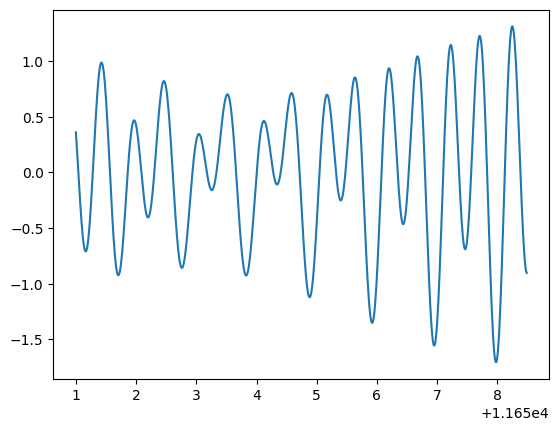

In [25]:
import matplotlib.pyplot as plt
plt.plot(t,tide_heights)

A good start!
TODO
Integrate real-world constituents (e.g., from TPXO).
Obtain location-specific amplitude and phase data.
Implement accurate pu and pf (nodal corrections) for location.